<a href="https://colab.research.google.com/github/cweidig/measuring_bias/blob/main/measure_bias_3clean_hmda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# read the file mortgage_data_project.pkl from Google drive with pandas' read_pickle()
import pandas as pd
import seaborn as sns
import numpy as np

pickle_df = pd.read_pickle('drive/My Drive/mortgage_data_project.pkl')

pickle_df.head()

,as_of_year,respondent_id,agency_name,agency_abbr,agency_code,loan_type_name,loan_type,property_type_name,property_type,loan_purpose_name,...,edit_status_name,edit_status,sequence_number,population,minority_population,hud_median_family_income,tract_to_msamd_income,number_of_owner_occupied_units,number_of_1_to_4_family_units,application_date_indicator
0,2011,0000009179,Office of the Comptroller of the Currency,OCC,1,Conventional,1,One-to-four family dwelling (other than manufa...,1,Refinancing,...,NaN,NaN,1653,5972.0,1.890000,66600.0,106.129997,1973.0,2194.0,0
1,2011,0000476810,Consumer Financial Protection Bureau,CFPB,9,Conventional,1,One-to-four family dwelling (other than manufa...,1,Refinancing,...,NaN,NaN,31273,4188.0,4.660000,49500.0,106.169998,1331.0,3113.0,0
2,2011,0000451965,Consumer Financial Protection Bureau,CFPB,9,Conventional,1,One-to-four family dwelling (other than manufa...,1,Refinancing,...,NaN,NaN,1164651,9565.0,42.529999,61200.0,100.330002,2504.0,3149.0,0
3,2011,0000030052,Federal Deposit Insurance Corporation,FDIC,3,Conventional,1,One-to-four family dwelling (other than manufa...,1,Home improvement,...,NaN,NaN,515,5928.0,9.990000,67400.0,170.520004,1755.0,2102.0,0
4,2011,0002888798,Federal Reserve System,FRS,2,FHA-insured,2,One-to-four family dwelling (other than manufa...,1,Home purchase,...,NaN,NaN,44491,4021.0,3.560000,54200.0,139.789993,1296.0,1487.0,0


In [6]:
# Do a quick inspection to get familiar with the dataset by
# (i) analyzing the number of rows and columns;
pickle_df.shape

# (ii) visualizing the first few lines of the dataset; and
pickle_df.head()

# (iii) listing the names of each variable and type.
pickle_df.columns
pickle_df.dtypes

as_of_year                          int64
respondent_id                      object
agency_name                        object
agency_abbr                        object
agency_code                         int64
                                   ...   
hud_median_family_income          float64
tract_to_msamd_income             float64
number_of_owner_occupied_units    float64
number_of_1_to_4_family_units     float64
application_date_indicator          int64
Length: 78, dtype: object

In [7]:
# Compute the frequencies of applicant_ethnicity_name, applicant_race_name_1, and applicant_sex_name columns.
pickle_df['applicant_ethnicity_name'].value_counts()

Not Hispanic or Latino    154805
Hispanic or Latino         11145
Name: applicant_ethnicity_name, dtype: int64

In [8]:
pickle_df['applicant_race_name_1'].value_counts()

White                                        142230
Black or African American                     12726
Asian                                          9119
American Indian or Alaska Native               1225
Native Hawaiian or Other Pacific Islander       650
Name: applicant_race_name_1, dtype: int64

In [9]:
pickle_df['applicant_sex_name'].value_counts()

Male      115246
Female     50704
Name: applicant_sex_name, dtype: int64

In [10]:
# Compute the frequency of the action_taken_name column
pickle_df['action_taken_name'].value_counts()

Loan originated                                94937
Application denied by financial institution    71013
Name: action_taken_name, dtype: int64

In [47]:
# Use the seaborn package to chart the values of the column action_taken_name as a bar plot
action_sum_df = pickle_df['action_taken_name'].value_counts().reset_index()
action_sum_df = action_sum_df.rename(columns={0: "Action", 1: "Count"})
action_sum_df
#sns.barplot(x = 'index', y = 'action_taken_name', data = action_sum_df)

,index,action_taken_name
0,Loan originated,94937
1,Application denied by financial institution,71013


In [ ]:
# Use the seaborn package to build a histogram of applicant_income_000s values
# For the number of bins, experiment with a few different values (for example, 10, 50, 100) and choose the one you think is suitable
sns.histplot(data=pickle_df, x='applicant_income_000s', bins=100)

<Axes: xlabel='log(applicant_income_000s)', ylabel='Count'>

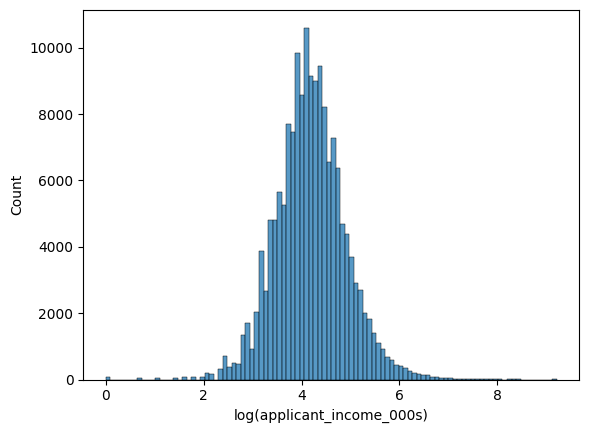

In [55]:
# Apply a log transformation to the raw applicant_income_000s values and add them as a new column to the dataframe named log(applicant_income_000s).
pickle_df['log(applicant_income_000s)'] = np.log(pickle_df['applicant_income_000s'])

# Plot another histogram for log(applicant_income_000s)
sns.histplot(data=pickle_df, x='log(applicant_income_000s)', bins=100)

<Axes: xlabel='log(applicant_income_000s)', ylabel='Count'>

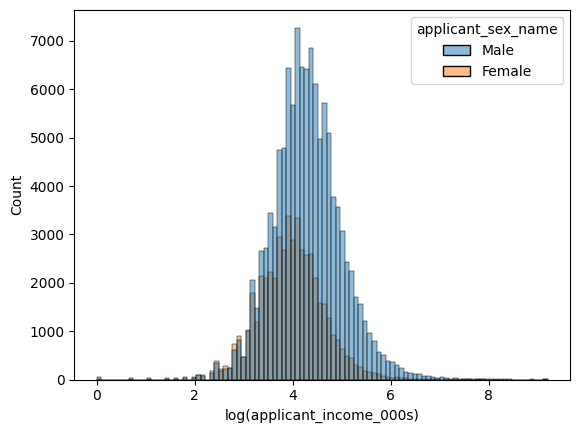

In [58]:
# Use the seaborn package to plot a histogram of log(applicant_income_000s) in relation to applicant_sex_name,
# overlaying the genders (male and female) in the same plot.
sns.histplot(data=pickle_df, x='log(applicant_income_000s)', hue = 'applicant_sex_name', bins=100)

In [86]:
# Create contingency tables to summarize the relationship of the following

# (applicant_ethnicity_name) and mortgage origination (action_taken_name)
# pickle_df[['applicant_ethnicity_name','action_taken_name']].value_counts().reset_index()
pd.crosstab(pickle_df['applicant_ethnicity_name'],pickle_df['action_taken_name'])

action_taken_name,Application denied by financial institution,Loan originated
applicant_ethnicity_name,,
Hispanic or Latino,6748,4397
Not Hispanic or Latino,64265,90540


In [73]:
# (applicant_race_name) and mortgage origination (action_taken_name)
pickle_df[['applicant_race_name_1','action_taken_name']].value_counts().reset_index()

,applicant_race_name_1,action_taken_name,0
0,White,Loan originated,84705
1,White,Application denied by financial institution,57525
2,Black or African American,Application denied by financial institution,9135
3,Asian,Loan originated,5921
4,Black or African American,Loan originated,3591
5,Asian,Application denied by financial institution,3198
6,American Indian or Alaska Native,Application denied by financial institution,791
7,American Indian or Alaska Native,Loan originated,434
8,Native Hawaiian or Other Pacific Islander,Application denied by financial institution,364
9,Native Hawaiian or Other Pacific Islander,Loan originated,286


In [72]:
# (applicant_sex_name) and mortgage origination (action_taken_name)
pickle_df[['applicant_sex_name','action_taken_name']].value_counts().reset_index()

,applicant_sex_name,action_taken_name,0
0,Male,Loan originated,70219
1,Male,Application denied by financial institution,45027
2,Female,Application denied by financial institution,25986
3,Female,Loan originated,24718


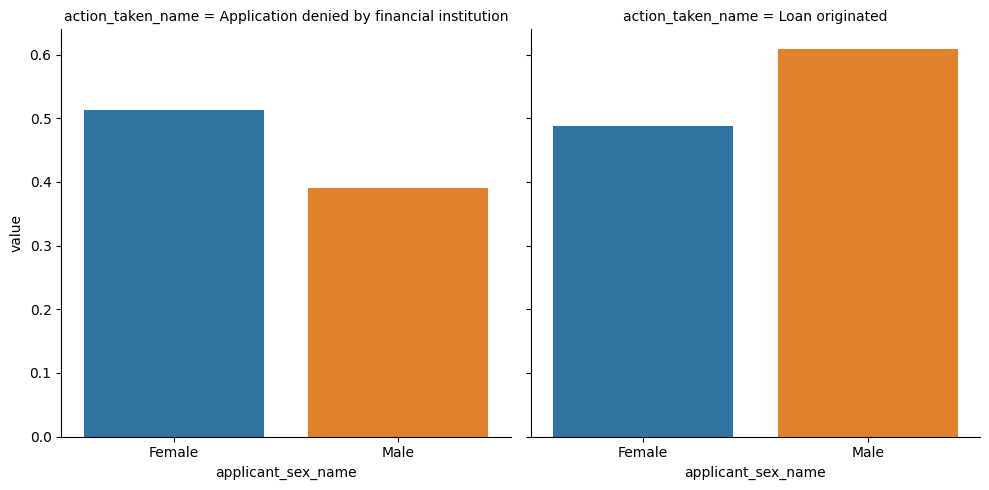

In [123]:
# Use the seaborn package to chart the result for applicant_sex_name and action_taken_name.
# Hint: use catplot to replicate the following chart
ct = pd.crosstab(pickle_df['applicant_sex_name'], pickle_df['action_taken_name'], normalize='index')
# ct
# alternate way to do same thing as normalize = 'index'
# d = ct.div(ct.sum(axis=1), axis=0)

#
c = ct.stack().reset_index().rename(columns={0: 'value'})
c

g = sns.catplot(data=c, x='applicant_sex_name', y= 'value',
                col = 'action_taken_name', kind='bar', hue = 'applicant_sex_name',
                height = 5)

# g.set_axis_labels(x_var='Gender', y_var='Count', clear_inner=True)
#g.set_titles(template = "Mortgage = ")

# plt.show()
#plt.xlabel("Gender")
#plt.ylabel("Count")

In [124]:
keep_vars = ['agency_abbr', 'loan_type_name', 'loan_amount_000s', 'owner_occupancy_name', 'loan_purpose_name', 'property_type_name', 'applicant_ethnicity_name', 'applicant_race_name_1', 'applicant_sex_name', 'applicant_income_000s', 'population', 'minority_population', 'hud_median_family_income', 'tract_to_msamd_income', 'number_of_owner_occupied_units', 'number_of_1_to_4_family_units', 'action_taken_name']

pickle_df_filtered = pickle_df[keep_vars]

pickle_df_filtered.columns

Index(['agency_abbr', 'loan_type_name', 'loan_amount_000s',
       'owner_occupancy_name', 'loan_purpose_name', 'property_type_name',
       'applicant_ethnicity_name', 'applicant_race_name_1',
       'applicant_sex_name', 'applicant_income_000s', 'population',
       'minority_population', 'hud_median_family_income',
       'tract_to_msamd_income', 'number_of_owner_occupied_units',
       'number_of_1_to_4_family_units', 'action_taken_name'],
      dtype='object')

In [150]:
# one hot encode categorical vars
from sklearn.preprocessing import OneHotEncoder

cat_variables = ['applicant_ethnicity_name', 'applicant_race_name_1', 'applicant_sex_name', 'agency_abbr', 'owner_occupancy_name', 'property_type_name', 'loan_purpose_name', 'loan_type_name']

oh= OneHotEncoder(sparse_output=False).set_output(transform="pandas")

#enc.fit(pickle_df_filtered[cat_variables])

one_hot_encoded=oh.fit_transform(pickle_df_filtered[cat_variables])

#Create a Pandas DataFrame of the hot encoded column
#ohe_df = pd.DataFrame(transformed)

#concat with original data
hmda_ohe_df = pd.concat([pickle_df_filtered, one_hot_encoded], axis=1).drop(cat_variables, axis=1)

hmda_ohe_df

,loan_amount_000s,applicant_income_000s,population,minority_population,hud_median_family_income,tract_to_msamd_income,number_of_owner_occupied_units,number_of_1_to_4_family_units,action_taken_name,applicant_ethnicity_name_Hispanic or Latino,...,owner_occupancy_name_Owner-occupied as a principal dwelling,property_type_name_Manufactured housing,property_type_name_One-to-four family dwelling (other than manufactured housing),loan_purpose_name_Home improvement,loan_purpose_name_Home purchase,loan_purpose_name_Refinancing,loan_type_name_Conventional,loan_type_name_FHA-insured,loan_type_name_FSA/RHS-guaranteed,loan_type_name_VA-guaranteed
0,102,151.0,5972.0,1.890000,66600.0,106.129997,1973.0,2194.0,Loan originated,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
1,114,30.0,4188.0,4.660000,49500.0,106.169998,1331.0,3113.0,Loan originated,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
2,105,112.0,9565.0,42.529999,61200.0,100.330002,2504.0,3149.0,Loan originated,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
3,270,182.0,5928.0,9.990000,67400.0,170.520004,1755.0,2102.0,Loan originated,0.0,...,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
4,62,36.0,4021.0,3.560000,54200.0,139.789993,1296.0,1487.0,Loan originated,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165945,116,72.0,6282.0,15.120000,66600.0,121.879997,1968.0,2283.0,Application denied by financial institution,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
165946,85,29.0,2930.0,2.830000,62800.0,130.320007,904.0,1021.0,Application denied by financial institution,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
165947,5,60.0,4301.0,47.220001,84500.0,52.560001,446.0,1211.0,Application denied by financial institution,0.0,...,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
165948,95,50.0,6101.0,7.330000,52700.0,93.489998,1633.0,2554.0,Application denied by financial institution,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0


In [157]:
# Set all values in the action_taken_name column that equal Application denied by financial institution to True and all other values to false.
hmda_ohe_df['action_taken_name'] = hmda_ohe_df['action_taken_name'] == 'Application denied by financial institution'

hmda_ohe_df

,loan_amount_000s,applicant_income_000s,population,minority_population,hud_median_family_income,tract_to_msamd_income,number_of_owner_occupied_units,number_of_1_to_4_family_units,action_taken_name,applicant_ethnicity_name_Hispanic or Latino,...,owner_occupancy_name_Owner-occupied as a principal dwelling,property_type_name_Manufactured housing,property_type_name_One-to-four family dwelling (other than manufactured housing),loan_purpose_name_Home improvement,loan_purpose_name_Home purchase,loan_purpose_name_Refinancing,loan_type_name_Conventional,loan_type_name_FHA-insured,loan_type_name_FSA/RHS-guaranteed,loan_type_name_VA-guaranteed
0,102,151.0,5972.0,1.890000,66600.0,106.129997,1973.0,2194.0,False,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
1,114,30.0,4188.0,4.660000,49500.0,106.169998,1331.0,3113.0,False,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
2,105,112.0,9565.0,42.529999,61200.0,100.330002,2504.0,3149.0,False,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
3,270,182.0,5928.0,9.990000,67400.0,170.520004,1755.0,2102.0,False,0.0,...,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
4,62,36.0,4021.0,3.560000,54200.0,139.789993,1296.0,1487.0,False,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165945,116,72.0,6282.0,15.120000,66600.0,121.879997,1968.0,2283.0,True,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
165946,85,29.0,2930.0,2.830000,62800.0,130.320007,904.0,1021.0,True,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
165947,5,60.0,4301.0,47.220001,84500.0,52.560001,446.0,1211.0,True,0.0,...,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
165948,95,50.0,6101.0,7.330000,52700.0,93.489998,1633.0,2554.0,True,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0


In [158]:
# Save the dataset as a pickled dataframe.
hmda_ohe_df.to_pickle("drive/My Drive/mortgage_data_cleaned.pkl")
